In [3]:
%matplotlib inline 
import matplotlib
import numpy as np
import pandas as pd

In [6]:
### Data transformation from previous notebooks
nyc = pd.read_csv('../data/central-park-raw.csv', parse_dates=[0])
# put it all in a function
def fix_col(colname):
    return colname.strip().replace(' ', '_')

def tweak_nyc(df_):
    return (df_
            .rename(columns=fix_col)
            .assign(PrecipitationIn = pd.to_numeric(df_.PrecipitationIn.replace("T", '0.001')),
                    Events=lambda df2: df2['Events'].fillna(''),
                    PrecipitationCm=lambda df2:df2.PrecipitationIn * 2.54)
           )

nyc = tweak_nyc(nyc)
nyc

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,8.0,9.0,3.0,10.0,0.00,8.0,,276.0,0.0000
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0,1.6002
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0,2.8702
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,10.0,4.0,15.0,7.0,20.0,0.00,3.0,,70.0,0.0000
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0,0.1270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,...,10.0,10.0,14.0,4.0,25.0,0.00,0.0,,257.0,0.0000
3283,2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,...,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0,0.2540
3284,2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,...,10.0,10.0,15.0,5.0,25.0,0.00,0.0,,308.0,0.0000
3285,2014-12-30,34.0,31.0,28.0,17.0,13.0,8.0,58.0,47.0,36.0,...,10.0,10.0,10.0,4.0,17.0,0.00,2.0,,5.0,0.0000


# Basic Stats

A nice feature of pandas is that you can quickly inspect data and get summary statistics.

In [7]:
# The describe method gives us basic stats. The result is a Data Frame
nyc.describe()

,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,PrecipitationCm
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3275.000000,...,3277.000000,3277.000000,3277.000000,3245.000000,3244.000000,3177.000000,3286.000000,3277.000000,3285.000000,3286.000000
mean,62.930898,56.042314,48.701674,47.334855,41.676712,35.374125,78.707458,62.108676,45.009132,30.113740,...,9.939274,8.663717,6.523955,14.487827,5.826449,22.755430,0.148832,3.231614,193.028919,0.378033
std,18.006236,16.953644,16.303976,17.901201,18.706095,19.586057,15.652513,14.548359,15.901280,0.209992,...,0.406343,2.041796,3.910295,4.355743,2.996004,7.064674,0.432399,2.745582,104.107605,1.098292
min,16.000000,12.000000,4.000000,-8.000000,-12.000000,-16.000000,28.000000,20.000000,6.000000,29.260000,...,5.000000,1.000000,0.000000,3.000000,0.000000,5.000000,0.000000,0.000000,-1.000000,0.000000
25%,48.000000,42.000000,36.000000,34.000000,27.000000,20.000000,67.000000,51.000000,34.000000,29.970000,...,10.000000,8.000000,2.000000,12.000000,4.000000,18.000000,0.000000,1.000000,78.000000,0.000000
50%,64.000000,57.000000,49.000000,50.000000,43.000000,36.000000,80.000000,62.000000,43.000000,30.100000,...,10.000000,10.000000,9.000000,14.000000,5.000000,22.000000,0.000000,3.000000,236.000000,0.000000
75%,79.000000,71.000000,63.000000,63.000000,58.000000,52.000000,93.000000,73.000000,54.000000,30.250000,...,10.000000,10.000000,10.000000,17.000000,7.000000,26.000000,0.050000,6.000000,279.000000,0.127000
max,104.000000,94.000000,84.000000,77.000000,75.000000,72.000000,100.000000,97.000000,93.000000,30.770000,...,10.000000,10.000000,10.000000,99.000000,99.000000,137.000000,7.570000,8.000000,360.000000,19.227800


In [8]:
# Remember transpose
nyc.describe().T

,count,mean,std,min,25%,50%,75%,max
Max_TemperatureF,3285.0,62.930898,18.006236,16.00,48.00,64.00,79.000,104.0000
Mean_TemperatureF,3285.0,56.042314,16.953644,12.00,42.00,57.00,71.000,94.0000
Min_TemperatureF,3285.0,48.701674,16.303976,4.00,36.00,49.00,63.000,84.0000
Max_Dew_PointF,3285.0,47.334855,17.901201,-8.00,34.00,50.00,63.000,77.0000
MeanDew_PointF,3285.0,41.676712,18.706095,-12.00,27.00,43.00,58.000,75.0000
Min_DewpointF,3285.0,35.374125,19.586057,-16.00,20.00,36.00,52.000,72.0000
Max_Humidity,3285.0,78.707458,15.652513,28.00,67.00,80.00,93.000,100.0000
Mean_Humidity,3285.0,62.108676,14.548359,20.00,51.00,62.00,73.000,97.0000
Min_Humidity,3285.0,45.009132,15.901280,6.00,34.00,43.00,54.000,93.0000
Max_Sea_Level_PressureIn,3275.0,30.113740,0.209992,29.26,29.97,30.10,30.250,30.7700


In [9]:
# to view non-numeric data pass include='all'
nyc.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
EST,3287,3287,2007-09-10,1,2006-01-01,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_TemperatureF,3285,NaN,NaT,NaN,NaT,NaT,62.9309,18.0062,16,48,64,79,104
Mean_TemperatureF,3285,NaN,NaT,NaN,NaT,NaT,56.0423,16.9536,12,42,57,71,94
Min_TemperatureF,3285,NaN,NaT,NaN,NaT,NaT,48.7017,16.304,4,36,49,63,84
Max_Dew_PointF,3285,NaN,NaT,NaN,NaT,NaT,47.3349,17.9012,-8,34,50,63,77
MeanDew_PointF,3285,NaN,NaT,NaN,NaT,NaT,41.6767,18.7061,-12,27,43,58,75
Min_DewpointF,3285,NaN,NaT,NaN,NaT,NaT,35.3741,19.5861,-16,20,36,52,72
Max_Humidity,3285,NaN,NaT,NaN,NaT,NaT,78.7075,15.6525,28,67,80,93,100
Mean_Humidity,3285,NaN,NaT,NaN,NaT,NaT,62.1087,14.5484,20,51,62,73,97
Min_Humidity,3285,NaN,NaT,NaN,NaT,NaT,45.0091,15.9013,6,34,43,54,93


In [10]:
# Various aggregation methods (max, mean, median, min, mad, skew, kurtosis, autocorr,
#   nunique, sem, std, var)
# and properties (hasnans, is_monotonic, is_unique)
nyc.Max_Humidity.max()

100.0

In [11]:
nyc.Max_Humidity.quantile(.2)

64.0

In [12]:
nyc.Max_Humidity.quantile([.2,.3])

0.2    64.0
0.3    70.0
Name: Max_Humidity, dtype: float64

In [13]:
nyc.Max_Humidity.min()

28.0

In [14]:
nyc.Mean_Humidity.corr(nyc.Mean_TemperatureF)

0.255606399799407

## Load Lab Data
https://archive.ics.uci.edu/ml/datasets/El+Nino

In [15]:
def fix_nino_col(name):
    return name.rstrip('.').replace('.', '_').replace(' ', '_')
def tweak_nino(df_):
    return (df_
           .rename(columns=fix_nino_col)
           .assign(air_temp_F=lambda df2:df2.air_temp*9/5+32,
                   zon_winds_mph=lambda df2:df2.zon_winds / 2.237,
                   mer_winds_mph=lambda df2:df2.mer_winds / 2.237,
                   date=pd.to_datetime(df_.date, format='%y%m%d')
                  )
            .drop(columns='obs')
           )

names = '''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')

nino = pd.read_csv('../data/tao-all2.dat.gz', sep=' ', names=names, na_values='.',
                  parse_dates=[[1,2,3]])

nino = tweak_nino(nino)

## Basic Stats Assignment
With the nino dataset:

* *Describe* the data
* Choose a column
  * Print out the max, min, and mean
* Correlate (``corr``) the temperature column with the date column (might need to use ``.astype('int64')`` method)

In [31]:
nino.describe()

,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,s_s_temp,air_temp_F,zon_winds_mph,mer_winds_mph
count,178080.000000,178080.000000,152917.000000,152918.000000,112319.000000,159843.000000,161073.000000,159843.000000,152917.000000,152918.000000
mean,0.473626,-54.025233,-3.304772,0.249762,81.236525,26.887567,27.715309,80.397620,-1.477323,0.111650
std,4.583041,135.363994,3.373492,2.999202,5.313061,1.816429,2.057428,3.269572,1.508043,1.340725
min,-8.810000,-180.000000,-12.400000,-11.600000,45.400000,17.050000,17.350000,62.690000,-5.543138,-5.185516
25%,-2.010000,-154.950000,-5.800000,-1.700000,77.700000,26.060000,26.770000,78.908000,-2.592758,-0.759946
50%,0.010000,-111.260000,-4.000000,0.300000,81.200000,27.340000,28.290000,81.212000,-1.788109,0.134108
75%,4.980000,147.010000,-1.400000,2.300000,84.800000,28.180000,29.230000,82.724000,-0.625838,1.028163
max,9.050000,171.080000,14.300000,13.000000,99.900000,31.660000,31.260000,88.988000,6.392490,5.811354


In [32]:
nino.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,178080.0,0.473626,4.583041,-8.810000,-2.010000,0.010000,4.980000,9.050000
longitude,178080.0,-54.025233,135.363994,-180.000000,-154.950000,-111.260000,147.010000,171.080000
zon_winds,152917.0,-3.304772,3.373492,-12.400000,-5.800000,-4.000000,-1.400000,14.300000
mer_winds,152918.0,0.249762,2.999202,-11.600000,-1.700000,0.300000,2.300000,13.000000
humidity,112319.0,81.236525,5.313061,45.400000,77.700000,81.200000,84.800000,99.900000
air_temp,159843.0,26.887567,1.816429,17.050000,26.060000,27.340000,28.180000,31.660000
s_s_temp,161073.0,27.715309,2.057428,17.350000,26.770000,28.290000,29.230000,31.260000
air_temp_F,159843.0,80.397620,3.269572,62.690000,78.908000,81.212000,82.724000,88.988000
zon_winds_mph,152917.0,-1.477323,1.508043,-5.543138,-2.592758,-1.788109,-0.625838,6.392490
mer_winds_mph,152918.0,0.111650,1.340725,-5.185516,-0.759946,0.134108,1.028163,5.811354


In [30]:
nino.air_temp.agg(['max', 'min', 'mean'])

max     31.660000
min     17.050000
mean    26.887567
Name: air_temp, dtype: float64

In [17]:
nino.date.corr(nino.air_temp)

TypeError: reduction operation 'corr' not allowed for this dtype

In [29]:
nino.date.astype(int).corr(nino.air_temp)

0.25726474869852334

In [27]:
(nino.date - nino.date.min()).dt.days.corr(nino.air_temp)

0.25726474869852317

In [16]:
nino

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,s_s_temp,air_temp_F,zon_winds_mph,mer_winds_mph
0,1980-03-07,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24,79.052,-3.039785,0.312919
1,1980-03-08,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97,78.188,-2.190434,0.491730
2,1980-03-09,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28,78.242,-2.011623,0.983460
3,1980-03-10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31,78.026,-1.698704,0.849352
4,1980-03-11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19,77.540,-1.877515,0.670541
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,1998-06-11,1998-06-11,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14,78.872,-2.279839,-0.178811
178076,1998-06-12,1998-06-12,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87,78.440,-1.922217,-1.475190
178077,1998-06-13,1998-06-13,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93,80.906,-2.726866,-2.145731
178078,1998-06-14,1998-06-14,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03,81.248,-2.190434,-1.028163


# Plotting

Pandas has built-in integration with Matplotlib. Other libraries such as Seaborn also support plotting DataFrames and Series. This is not an in depth intro to Matplotlib, but their website and gallery are great for finding more information

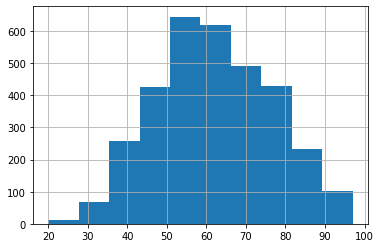

In [33]:
# histograms are a quick way to visualize the distribution
nyc.Mean_Humidity.hist()

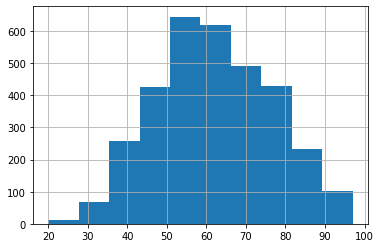

In [164]:
# Notice the output. Get rid of it by assigning to an "ignored" variable
_ = nyc.Mean_Humidity.hist()

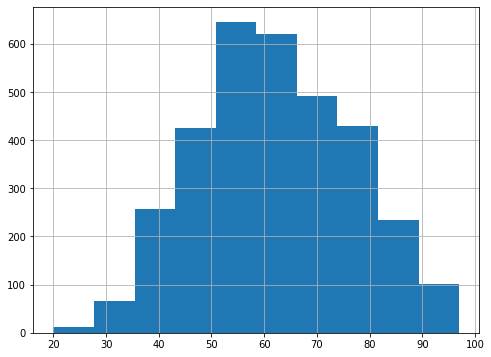

In [35]:
# add in figsize=(width,height) to boost size
nyc.Mean_Humidity.hist(figsize=(8,6))

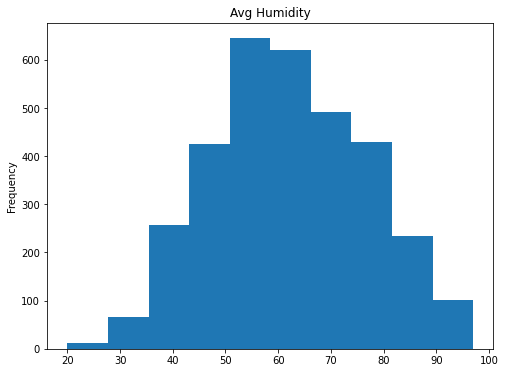

In [37]:
# If we use the .plot method we can add title and other attributes
nyc.Mean_Humidity.plot.hist(title='Avg Humidity', figsize=(8, 6))

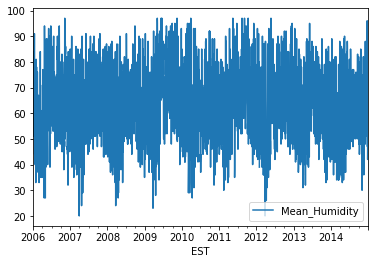

In [38]:
nyc.plot(x='EST', y='Mean_Humidity')

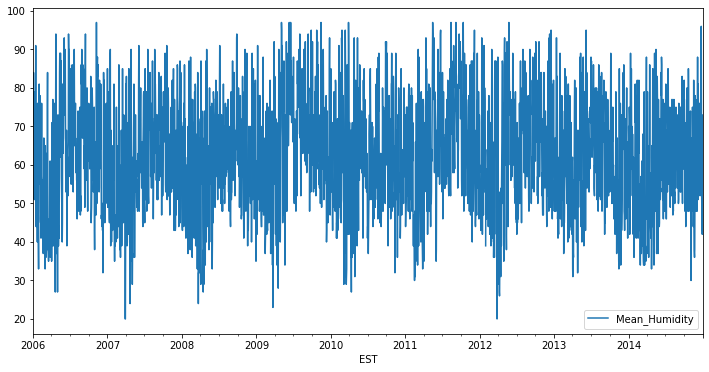

In [39]:
nyc.plot(x='EST', y='Mean_Humidity', figsize=(12, 6) )

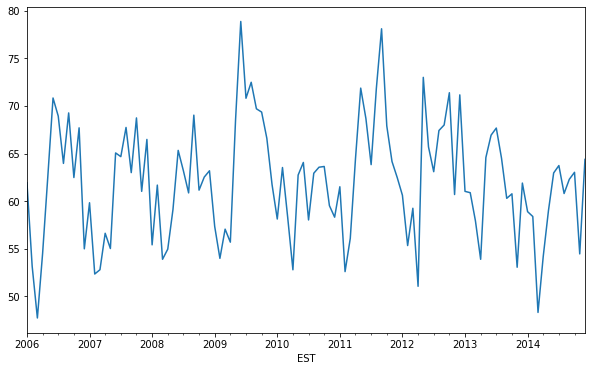

In [40]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
nyc.set_index('EST').Mean_Humidity.resample('M').mean().plot(figsize=(10, 6)) 

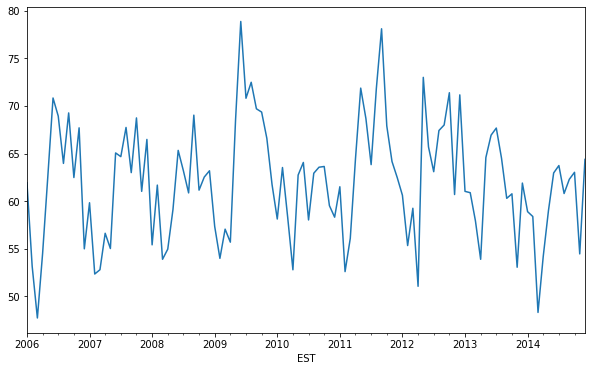

In [42]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
(nyc
 .set_index('EST')
 .Mean_Humidity
 .resample('M')
 .mean()
 .plot(figsize=(10, 6)) 
)

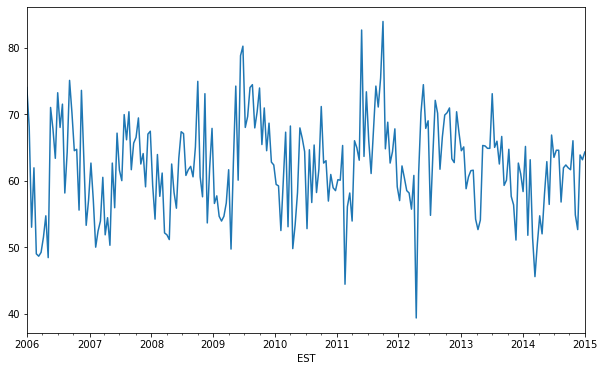

In [43]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
(nyc
 .set_index('EST')
 .Mean_Humidity
 .resample('2W')
 .mean()
 .plot(figsize=(10, 6)) 
)

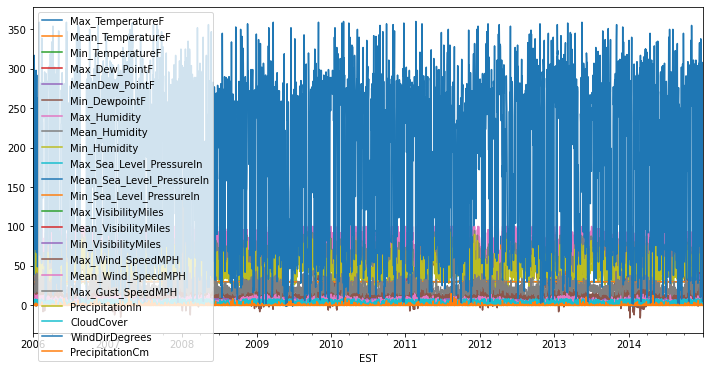

In [45]:
# Plot all the things (may be useful or just art)
nyc.set_index('EST').plot(figsize=(12,6))

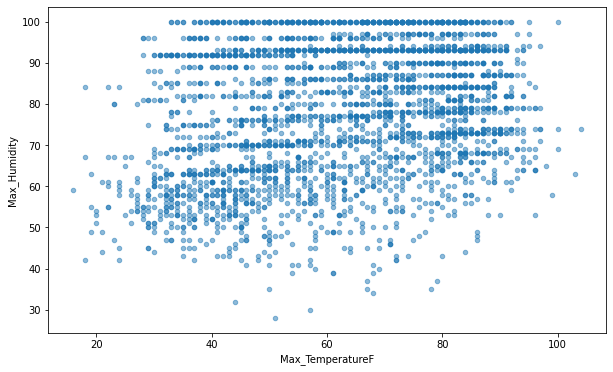

In [47]:
nyc.plot.scatter(x='Max_TemperatureF', y='Max_Humidity', alpha=.5, 
        figsize=(10, 6))

In [48]:
nyc.Max_TemperatureF.corr(nyc.Max_Humidity)

0.2739156120229223

## Plotting Assignment
With the nino dataset:
* Plot a histogram of air temp
* Plot a scatter plot of latitude and longitude


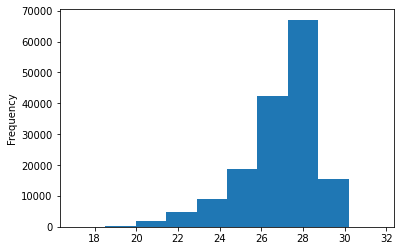

In [49]:
nino.air_temp.plot.hist()

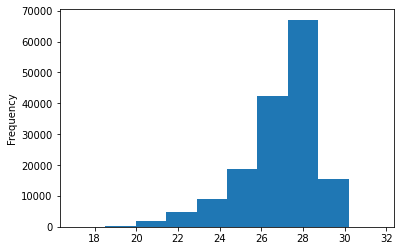

In [49]:
nino.air_temp.plot.hist()

# Filtering

In [50]:
# When we apply a conditional operator to a series we get back a series of True/False values
# We call this a "mask", which we can use to filter (similar to Photoshop)
# all EST in 2000's
m2000 = nyc.EST.dt.year >= 2000

# below 2010
lt2010 = nyc.EST.dt.year < 2010

In [51]:
# The "and" operation looks at whether the operands are truthy or falsey
# This is a case where normal Python syntax doesn't work
nyc[m2000 and lt2010]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [52]:
# & does bitwise comparisons - which is what we want
nyc[m2000 & lt2010]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,8.0,9.0,3.0,10.0,0.000,8.0,,276.0,0.00000
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,8.0,4.0,18.0,5.0,24.0,0.630,5.0,Rain,76.0,1.60020
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,7.0,2.0,28.0,15.0,41.0,1.130,8.0,Rain,39.0,2.87020
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,10.0,4.0,15.0,7.0,20.0,0.000,3.0,,70.0,0.00000
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,6.0,2.0,15.0,5.0,21.0,0.050,6.0,Rain,251.0,0.12700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2009-12-27,55.0,48.0,40.0,54.0,41.0,24.0,100.0,68.0,36.0,...,7.0,2.0,16.0,8.0,29.0,0.330,5.0,Rain,224.0,0.83820
1457,2009-12-28,43.0,37.0,30.0,33.0,21.0,14.0,73.0,59.0,44.0,...,10.0,10.0,18.0,9.0,29.0,0.000,4.0,,259.0,0.00000
1458,2009-12-29,31.0,24.0,16.0,17.0,3.0,-3.0,58.0,47.0,36.0,...,10.0,10.0,29.0,14.0,40.0,0.001,1.0,,289.0,0.00254
1459,2009-12-30,32.0,26.0,19.0,14.0,11.0,5.0,62.0,55.0,47.0,...,10.0,10.0,14.0,6.0,22.0,0.000,1.0,,249.0,0.00000


In [53]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[nyc.EST.dt.year >= 2000 & nyc.EST.dt.year < 2010]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [54]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[(nyc.EST.dt.year >= 2000) & (nyc.EST.dt.year < 2010)]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,8.0,9.0,3.0,10.0,0.000,8.0,,276.0,0.00000
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,8.0,4.0,18.0,5.0,24.0,0.630,5.0,Rain,76.0,1.60020
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,7.0,2.0,28.0,15.0,41.0,1.130,8.0,Rain,39.0,2.87020
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,10.0,4.0,15.0,7.0,20.0,0.000,3.0,,70.0,0.00000
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,6.0,2.0,15.0,5.0,21.0,0.050,6.0,Rain,251.0,0.12700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2009-12-27,55.0,48.0,40.0,54.0,41.0,24.0,100.0,68.0,36.0,...,7.0,2.0,16.0,8.0,29.0,0.330,5.0,Rain,224.0,0.83820
1457,2009-12-28,43.0,37.0,30.0,33.0,21.0,14.0,73.0,59.0,44.0,...,10.0,10.0,18.0,9.0,29.0,0.000,4.0,,259.0,0.00000
1458,2009-12-29,31.0,24.0,16.0,17.0,3.0,-3.0,58.0,47.0,36.0,...,10.0,10.0,29.0,14.0,40.0,0.001,1.0,,289.0,0.00254
1459,2009-12-30,32.0,26.0,19.0,14.0,11.0,5.0,62.0,55.0,47.0,...,10.0,10.0,14.0,6.0,22.0,0.000,1.0,,249.0,0.00000


In [55]:
m_dec = nyc.EST.dt.month == 12
nyc[m_dec]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
334,2006-12-01,70.0,60.0,49.0,63.0,58.0,27.0,93.0,67.0,41.0,...,9.0,2.0,23.0,8.0,44.0,0.23,7.0,Rain,196.0,0.5842
335,2006-12-02,49.0,44.0,39.0,28.0,24.0,20.0,57.0,46.0,34.0,...,10.0,10.0,21.0,8.0,37.0,0.00,0.0,,281.0,0.0000
336,2006-12-03,46.0,41.0,35.0,29.0,23.0,19.0,57.0,47.0,36.0,...,10.0,10.0,13.0,5.0,20.0,0.00,0.0,,247.0,0.0000
337,2006-12-04,41.0,36.0,31.0,25.0,17.0,10.0,59.0,46.0,32.0,...,10.0,10.0,18.0,7.0,32.0,0.00,2.0,,291.0,0.0000
338,2006-12-05,37.0,33.0,29.0,18.0,13.0,10.0,53.0,44.0,35.0,...,10.0,10.0,17.0,6.0,26.0,0.00,2.0,,275.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,...,10.0,10.0,14.0,4.0,25.0,0.00,0.0,,257.0,0.0000
3283,2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,...,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0,0.2540
3284,2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,...,10.0,10.0,15.0,5.0,25.0,0.00,0.0,,308.0,0.0000
3285,2014-12-30,34.0,31.0,28.0,17.0,13.0,8.0,58.0,47.0,36.0,...,10.0,10.0,10.0,4.0,17.0,0.00,2.0,,5.0,0.0000


In [56]:
# Can use loc to filter out based on index value, also takes a boolean index
# In fact, you should use .loc instead as a matter of habit (you won't see warnings)
nyc.loc[m_dec]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
334,2006-12-01,70.0,60.0,49.0,63.0,58.0,27.0,93.0,67.0,41.0,...,9.0,2.0,23.0,8.0,44.0,0.23,7.0,Rain,196.0,0.5842
335,2006-12-02,49.0,44.0,39.0,28.0,24.0,20.0,57.0,46.0,34.0,...,10.0,10.0,21.0,8.0,37.0,0.00,0.0,,281.0,0.0000
336,2006-12-03,46.0,41.0,35.0,29.0,23.0,19.0,57.0,47.0,36.0,...,10.0,10.0,13.0,5.0,20.0,0.00,0.0,,247.0,0.0000
337,2006-12-04,41.0,36.0,31.0,25.0,17.0,10.0,59.0,46.0,32.0,...,10.0,10.0,18.0,7.0,32.0,0.00,2.0,,291.0,0.0000
338,2006-12-05,37.0,33.0,29.0,18.0,13.0,10.0,53.0,44.0,35.0,...,10.0,10.0,17.0,6.0,26.0,0.00,2.0,,275.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,...,10.0,10.0,14.0,4.0,25.0,0.00,0.0,,257.0,0.0000
3283,2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,...,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0,0.2540
3284,2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,...,10.0,10.0,15.0,5.0,25.0,0.00,0.0,,308.0,0.0000
3285,2014-12-30,34.0,31.0,28.0,17.0,13.0,8.0,58.0,47.0,36.0,...,10.0,10.0,10.0,4.0,17.0,0.00,2.0,,5.0,0.0000


In [57]:
# Can use loc to filter out based on index value, also takes a boolean index
# 2nd option in index op is column names (: to include everything)
nyc.loc[m_dec, [x for x in nyc.columns if 'Max' in x]]

,Max_TemperatureF,Max_Dew_PointF,Max_Humidity,Max_Sea_Level_PressureIn,Max_VisibilityMiles,Max_Wind_SpeedMPH,Max_Gust_SpeedMPH
334,70.0,63.0,93.0,29.96,10.0,23.0,44.0
335,49.0,28.0,57.0,30.38,10.0,21.0,37.0
336,46.0,29.0,57.0,30.47,10.0,13.0,20.0
337,41.0,25.0,59.0,30.17,10.0,18.0,32.0
338,37.0,18.0,53.0,30.40,10.0,17.0,26.0
...,...,...,...,...,...,...,...
3282,55.0,35.0,53.0,30.27,10.0,14.0,25.0
3283,54.0,43.0,92.0,30.07,10.0,15.0,22.0
3284,44.0,25.0,53.0,30.26,10.0,15.0,25.0
3285,34.0,17.0,58.0,30.40,10.0,10.0,17.0


In [58]:
# loc note:
# can use set_index and sort_index to do quick lookups (if you sort you get quick lookups)
nyc.set_index('Events').sort_index().head()

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,PrecipitationCm
Events,,,,,,,,,,,,,,,,,,,,,
,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,10.0,8.0,9.0,3.0,10.0,0.0,8.0,276.0,0.0
,2011-04-29,69.0,62.0,54.0,44.0,41.0,38.0,62.0,49.0,35.0,...,10.0,10.0,10.0,16.0,7.0,23.0,0.0,4.0,262.0,0.0
,2011-04-30,67.0,59.0,50.0,41.0,37.0,33.0,64.0,48.0,31.0,...,10.0,10.0,10.0,15.0,5.0,22.0,0.0,4.0,17.0,0.0
,2011-05-01,69.0,60.0,50.0,42.0,39.0,35.0,74.0,53.0,32.0,...,10.0,10.0,10.0,13.0,5.0,18.0,0.0,0.0,133.0,0.0
,2011-05-02,63.0,57.0,50.0,50.0,45.0,39.0,83.0,72.0,60.0,...,10.0,10.0,10.0,10.0,5.0,16.0,0.0,5.0,131.0,0.0


In [59]:
(nyc
 .set_index('Events')
 .sort_index()
 .loc['Fog']
)

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,PrecipitationCm
Events,,,,,,,,,,,,,,,,,,,,,
Fog,2013-01-13,50.0,47.0,43.0,49.0,44.0,42.0,100.0,93.0,86.0,...,10.0,4.0,0.0,12.0,3.0,18.0,0.000,8.0,160.0,0.00000
Fog,2006-05-27,82.0,72.0,64.0,65.0,62.0,58.0,100.0,79.0,45.0,...,10.0,4.0,0.0,10.0,3.0,18.0,0.010,3.0,19.0,0.02540
Fog,2009-03-02,28.0,22.0,16.0,27.0,17.0,2.0,96.0,75.0,54.0,...,10.0,4.0,0.0,20.0,11.0,32.0,0.490,8.0,352.0,1.24460
Fog,2011-03-22,50.0,45.0,40.0,39.0,32.0,26.0,100.0,71.0,42.0,...,10.0,8.0,0.0,16.0,9.0,25.0,0.001,6.0,301.0,0.00254
Fog,2011-05-24,81.0,74.0,66.0,70.0,64.0,59.0,100.0,76.0,51.0,...,10.0,6.0,0.0,13.0,5.0,18.0,0.000,5.0,253.0,0.00000
Fog,2006-03-13,62.0,56.0,50.0,52.0,50.0,48.0,100.0,84.0,67.0,...,7.0,3.0,0.0,14.0,4.0,28.0,0.000,4.0,77.0,0.00000
Fog,2012-11-12,66.0,57.0,48.0,58.0,52.0,46.0,100.0,84.0,67.0,...,10.0,6.0,0.0,15.0,4.0,24.0,0.000,3.0,182.0,0.00000
Fog,2012-10-03,73.0,68.0,63.0,68.0,66.0,63.0,100.0,92.0,84.0,...,5.0,3.0,0.0,6.0,2.0,9.0,0.000,7.0,52.0,0.00000
Fog,2007-07-30,86.0,78.0,70.0,70.0,69.0,66.0,97.0,74.0,51.0,...,10.0,3.0,0.0,8.0,2.0,14.0,0.000,3.0,311.0,0.00000


In [60]:
# Can use iloc to filter out based on index location (or position)
# 2nd option in index op is column indices
nyc.iloc[5:10, [2, 5, -2]]  

,Mean_TemperatureF,MeanDew_PointF,WindDirDegrees
5,37.0,24.0,317.0
6,30.0,14.0,267.0
7,40.0,25.0,192.0
8,52.0,36.0,249.0
9,45.0,28.0,261.0


In [61]:
# Can use iloc to filter out based on index location
# 2nd option in index op is column indices
nyc.iloc[:, [2, 5, -2]]  

,Mean_TemperatureF,MeanDew_PointF,WindDirDegrees
0,37.0,30.0,276.0
1,44.0,34.0,76.0
2,37.0,33.0,39.0
3,34.0,26.0,70.0
4,44.0,35.0,251.0
...,...,...,...
3282,50.0,31.0,257.0
3283,49.0,37.0,264.0
3284,39.0,19.0,308.0
3285,31.0,13.0,5.0


## Filtering Assignment
Using the nino dataframe:
* Create a mask, ``m80``, that all years >= 1980 and < 1990
* Create a mask, ``m90``, that all years >= 1990 and < 2000
* Create a mask, ``lon120``, that has all longitudes > 120
* Create a mask, ``lat0``, that has latitudes > -2 and < 2
* Create a dataframe, ``df80``, that has only those values in ``m80`` and ``lon120`` and ``lat0``
* Create a dataframe, ``df90``, that has only those values in ``m90`` and ``lon120`` and ``lat0``


In [64]:
m80 = (nino.date.dt.year >= 1980) & (nino.date.dt.year < 1990)
m90 = (nino.date.dt.year >= 1990) & (nino.date.dt.year < 2000)

In [66]:
lon120 = nino.longitude > 120
lat0 = (nino.latitude > -2) & (nino.latitude < 2)

In [68]:
df80 = nino[m80 & lon120 & lat0]
df90 = nino[m80 & lon120 & lat0]

In [71]:
nino.query('date.dt.year >= 1980 and date.dt.year < 1990 and longitude > 120 and latitude > -2 and latitude < 2')

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,s_s_temp,air_temp_F,zon_winds_mph,mer_winds_mph
22471,1986-04-21,1986-04-21,0.05,164.99,-6.9,-1.5,NaN,28.80,NaN,83.840,-3.084488,-0.670541
22472,1986-04-22,1986-04-22,0.05,164.98,-6.2,-0.6,NaN,28.69,NaN,83.642,-2.771569,-0.268216
22473,1986-04-23,1986-04-23,0.05,164.99,-4.1,-2.5,NaN,28.54,NaN,83.372,-1.832812,-1.117568
22474,1986-04-24,1986-04-24,0.05,164.99,-4.7,-3.2,NaN,28.49,NaN,83.282,-2.101028,-1.430487
22475,1986-04-25,1986-04-25,0.04,164.99,-4.4,-0.7,NaN,28.39,NaN,83.102,-1.966920,-0.312919
...,...,...,...,...,...,...,...,...,...,...,...,...
83845,1988-12-05,1988-12-05,-1.99,164.92,-4.7,-1.3,NaN,27.52,28.83,81.536,-2.101028,-0.581135
83846,1988-12-06,1988-12-06,-1.99,164.92,-5.7,-1.7,NaN,27.62,28.73,81.716,-2.548055,-0.759946
83853,1988-12-13,1988-12-13,-1.99,164.93,2.2,-3.3,NaN,26.93,27.61,80.474,0.983460,-1.475190
83854,1988-12-14,1988-12-14,-1.99,164.93,1.5,-5.3,NaN,26.97,27.54,80.546,0.670541,-2.369245


# Dealing with NaN

In [73]:
nyc.isna()

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3284,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
nyc.isna().any()

EST                          False
Max_TemperatureF              True
Mean_TemperatureF             True
Min_TemperatureF              True
Max_Dew_PointF                True
MeanDew_PointF                True
Min_DewpointF                 True
Max_Humidity                  True
Mean_Humidity                 True
Min_Humidity                  True
Max_Sea_Level_PressureIn      True
Mean_Sea_Level_PressureIn     True
Min_Sea_Level_PressureIn      True
Max_VisibilityMiles           True
Mean_VisibilityMiles          True
Min_VisibilityMiles           True
Max_Wind_SpeedMPH             True
Mean_Wind_SpeedMPH            True
Max_Gust_SpeedMPH             True
PrecipitationIn               True
CloudCover                    True
Events                       False
WindDirDegrees                True
PrecipitationCm               True
dtype: bool

In [75]:
nyc.isna().any(axis=0)

EST                          False
Max_TemperatureF              True
Mean_TemperatureF             True
Min_TemperatureF              True
Max_Dew_PointF                True
MeanDew_PointF                True
Min_DewpointF                 True
Max_Humidity                  True
Mean_Humidity                 True
Min_Humidity                  True
Max_Sea_Level_PressureIn      True
Mean_Sea_Level_PressureIn     True
Min_Sea_Level_PressureIn      True
Max_VisibilityMiles           True
Mean_VisibilityMiles          True
Min_VisibilityMiles           True
Max_Wind_SpeedMPH             True
Mean_Wind_SpeedMPH            True
Max_Gust_SpeedMPH             True
PrecipitationIn               True
CloudCover                    True
Events                       False
WindDirDegrees                True
PrecipitationCm               True
dtype: bool

In [77]:
# find rows that have null data
# fish create a mask
nyc.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
3282    False
3283    False
3284    False
3285    False
3286    False
Length: 3287, dtype: bool

In [80]:
# count missing trick
nyc.isna().sum()

EST                            0
Max_TemperatureF               2
Mean_TemperatureF              2
Min_TemperatureF               2
Max_Dew_PointF                 2
MeanDew_PointF                 2
Min_DewpointF                  2
Max_Humidity                   2
Mean_Humidity                  2
Min_Humidity                   2
Max_Sea_Level_PressureIn      12
Mean_Sea_Level_PressureIn     12
Min_Sea_Level_PressureIn      12
Max_VisibilityMiles           10
Mean_VisibilityMiles          10
Min_VisibilityMiles           10
Max_Wind_SpeedMPH             42
Mean_Wind_SpeedMPH            43
Max_Gust_SpeedMPH            110
PrecipitationIn                1
CloudCover                    10
Events                         0
WindDirDegrees                 2
PrecipitationCm                1
dtype: int64

In [81]:
# percent missing trick
nyc.isna().mean().mul(100)

EST                          0.000000
Max_TemperatureF             0.060846
Mean_TemperatureF            0.060846
Min_TemperatureF             0.060846
Max_Dew_PointF               0.060846
MeanDew_PointF               0.060846
Min_DewpointF                0.060846
Max_Humidity                 0.060846
Mean_Humidity                0.060846
Min_Humidity                 0.060846
Max_Sea_Level_PressureIn     0.365075
Mean_Sea_Level_PressureIn    0.365075
Min_Sea_Level_PressureIn     0.365075
Max_VisibilityMiles          0.304229
Mean_VisibilityMiles         0.304229
Min_VisibilityMiles          0.304229
Max_Wind_SpeedMPH            1.277761
Mean_Wind_SpeedMPH           1.308184
Max_Gust_SpeedMPH            3.346517
PrecipitationIn              0.030423
CloudCover                   0.304229
Events                       0.000000
WindDirDegrees               0.060846
PrecipitationCm              0.030423
dtype: float64

In [82]:
nyc[nyc.isna().any(axis=1)]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
86,2006-03-28,55.0,49.0,43.0,31.0,25.0,21.0,58.0,41.0,29.0,...,10.0,10.0,10.0,5.0,NaN,0.00,3.0,,93.0,0.0000
87,2006-03-29,63.0,52.0,41.0,34.0,26.0,21.0,73.0,41.0,23.0,...,10.0,10.0,12.0,5.0,NaN,0.00,0.0,,129.0,0.0000
103,2006-04-14,66.0,60.0,53.0,55.0,49.0,41.0,100.0,74.0,43.0,...,6.0,2.0,10.0,3.0,NaN,0.21,5.0,Rain,137.0,0.5334
116,2006-04-27,73.0,60.0,48.0,37.0,32.0,28.0,59.0,37.0,21.0,...,10.0,10.0,8.0,5.0,NaN,0.00,2.0,,299.0,0.0000
123,2006-05-04,82.0,66.0,53.0,53.0,49.0,39.0,94.0,62.0,23.0,...,10.0,10.0,9.0,4.0,NaN,0.00,1.0,,215.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,2014-01-24,19.0,15.0,10.0,0.0,-4.0,-9.0,55.0,42.0,28.0,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,,-1.0,0.0000
2956,2014-02-04,35.0,29.0,22.0,24.0,21.0,16.0,81.0,71.0,61.0,...,5.0,2.0,7.0,2.0,NaN,0.00,2.0,,74.0,0.0000
3049,2014-05-08,59.0,56.0,53.0,54.0,51.0,40.0,93.0,72.0,51.0,...,4.0,1.0,8.0,5.0,NaN,0.41,8.0,Rain,81.0,1.0414
3120,2014-07-18,81.0,73.0,64.0,57.0,53.0,50.0,73.0,55.0,36.0,...,10.0,10.0,9.0,4.0,NaN,0.00,0.0,,44.0,0.0000


In [83]:
missing_df = nyc.isna() 
nyc[missing_df.Max_TemperatureF]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
2219,2012-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,,NaN,0.0
2220,2012-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN


In [84]:
nyc.loc[2218:2221]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
2218,2012-01-28,44.0,40.0,37.0,27.0,25.0,23.0,57.0,53.0,49.0,...,10.0,10.0,17.0,10.0,26.0,0.0,3.0,,282.0,0.0
2219,2012-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,,NaN,0.0
2220,2012-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2221,2012-01-31,55.0,54.0,54.0,31.0,30.0,30.0,41.0,39.0,37.0,...,10.0,10.0,13.0,9.0,18.0,0.0,1.0,,224.0,0.0


In [85]:
nyc.Max_TemperatureF.fillna(nyc.Max_TemperatureF.mean()).loc[2218:2221]

2218    44.000000
2219    62.930898
2220    62.930898
2221    55.000000
Name: Max_TemperatureF, dtype: float64

In [86]:
# The .interpolate method will do linear interpolation by default
nyc.Max_TemperatureF.interpolate().loc[2218:2221]

2218    44.000000
2219    47.666667
2220    51.333333
2221    55.000000
Name: Max_TemperatureF, dtype: float64

In [87]:
# forward fill
nyc.Max_TemperatureF.ffill().loc[2218:2221]

2218    44.0
2219    44.0
2220    44.0
2221    55.0
Name: Max_TemperatureF, dtype: float64

In [88]:
# forward fill
nyc.Max_TemperatureF.bfill().loc[2218:2221]

2218    44.0
2219    55.0
2220    55.0
2221    55.0
Name: Max_TemperatureF, dtype: float64

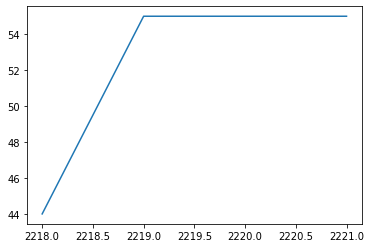

In [89]:
# tack on a plot to visualize
nyc.Max_TemperatureF.bfill().loc[2218:2221].plot()

In [90]:
#dropping rows with missing data
nyc.dropna()

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,PrecipitationCm
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,8.0,9.0,3.0,10.0,0.00,8.0,,276.0,0.0000
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0,1.6002
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0,2.8702
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,10.0,4.0,15.0,7.0,20.0,0.00,3.0,,70.0,0.0000
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0,0.1270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,...,10.0,10.0,14.0,4.0,25.0,0.00,0.0,,257.0,0.0000
3283,2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,...,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0,0.2540
3284,2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,...,10.0,10.0,15.0,5.0,25.0,0.00,0.0,,308.0,0.0000
3285,2014-12-30,34.0,31.0,28.0,17.0,13.0,8.0,58.0,47.0,36.0,...,10.0,10.0,10.0,4.0,17.0,0.00,2.0,,5.0,0.0000


## Dealing with NaN Assignment
With the nino dataset:
* Find the rows that have null data
* Find the columns that have null data
* It looks like the ``zon_winds`` has some missing values, use summary stats or plotting to determine how to fill in those values

In [92]:
nino.isna().any(axis=1)

0          True
1          True
2          True
3          True
4          True
          ...  
178075    False
178076    False
178077    False
178078    False
178079     True
Length: 178080, dtype: bool

In [93]:
nino.isna().any(axis=0)

year_month_day    False
date              False
latitude          False
longitude         False
zon_winds          True
mer_winds          True
humidity           True
air_temp           True
s_s_temp           True
air_temp_F         True
zon_winds_mph      True
mer_winds_mph      True
dtype: bool

In [101]:
nino.isna().mean(axis=0).mul(100)

year_month_day     0.000000
date               0.000000
latitude           0.000000
longitude          0.000000
zon_winds         14.130166
mer_winds         14.129605
humidity          36.927785
air_temp          10.240903
s_s_temp           9.550202
air_temp_F        10.240903
zon_winds_mph     14.130166
mer_winds_mph     14.129605
dtype: float64

In [94]:
nino[nino.isna().zon_winds]

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,s_s_temp,air_temp_F,zon_winds_mph,mer_winds_mph
659,1982-12-20,1982-12-20,0.04,-109.22,NaN,NaN,NaN,27.01,27.60,80.618,NaN,NaN
660,1982-12-21,1982-12-21,0.04,-109.22,NaN,NaN,NaN,27.02,27.66,80.636,NaN,NaN
661,1982-12-22,1982-12-22,0.04,-109.22,NaN,NaN,NaN,27.24,27.76,81.032,NaN,NaN
662,1982-12-23,1982-12-23,0.04,-109.22,NaN,NaN,NaN,26.79,27.83,80.222,NaN,NaN
663,1982-12-24,1982-12-24,0.04,-109.22,NaN,NaN,NaN,27.08,27.93,80.744,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
177433,1996-09-07,1996-09-07,9.00,-140.26,NaN,NaN,NaN,27.64,28.22,81.752,NaN,NaN
177438,1996-09-12,1996-09-12,9.00,-140.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177655,1997-04-17,1997-04-17,9.00,-140.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177656,1997-04-18,1997-04-18,8.98,-140.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
nino.isna().corr().style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,s_s_temp,air_temp_F,zon_winds_mph,mer_winds_mph
year_month_day,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
date,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
latitude,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
longitude,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
zon_winds,nan,nan,nan,nan,1.000000,0.999977,0.107489,0.149311,-0.006205,0.149311,1.000000,0.999977
mer_winds,nan,nan,nan,nan,0.999977,1.000000,0.107469,0.149266,-0.006254,0.149266,0.999977,1.000000
humidity,nan,nan,nan,nan,0.107489,0.107469,1.000000,0.307195,0.262980,0.307195,0.107489,0.107469
air_temp,nan,nan,nan,nan,0.149311,0.149266,0.307195,1.000000,0.275915,1.000000,0.149311,0.149266
s_s_temp,nan,nan,nan,nan,-0.006205,-0.006254,0.262980,0.275915,1.000000,0.275915,-0.006205,-0.006254
air_temp_F,nan,nan,nan,nan,0.149311,0.149266,0.307195,1.000000,0.275915,1.000000,0.149311,0.149266


In [105]:
nino.corr().style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,s_s_temp,air_temp_F,zon_winds_mph,mer_winds_mph
latitude,1.000000,0.041597,0.084013,-0.058236,0.153280,0.046550,0.100229,0.046550,0.084013,-0.058236
longitude,0.041597,1.000000,0.379356,-0.088127,-0.041844,0.308059,0.382318,0.308059,0.379356,-0.088127
zon_winds,0.084013,0.379356,1.000000,0.050050,0.061783,0.225011,0.354195,0.225011,1.000000,0.050050
mer_winds,-0.058236,-0.088127,0.050050,1.000000,0.079993,-0.363404,-0.311473,-0.363404,0.050050,1.000000
humidity,0.153280,-0.041844,0.061783,0.079993,1.000000,-0.384973,-0.318464,-0.384973,0.061783,0.079993
air_temp,0.046550,0.308059,0.225011,-0.363404,-0.384973,1.000000,0.944352,1.000000,0.225011,-0.363404
s_s_temp,0.100229,0.382318,0.354195,-0.311473,-0.318464,0.944352,1.000000,0.944352,0.354195,-0.311473
air_temp_F,0.046550,0.308059,0.225011,-0.363404,-0.384973,1.000000,0.944352,1.000000,0.225011,-0.363404
zon_winds_mph,0.084013,0.379356,1.000000,0.050050,0.061783,0.225011,0.354195,0.225011,1.000000,0.050050
mer_winds_mph,-0.058236,-0.088127,0.050050,1.000000,0.079993,-0.363404,-0.311473,-0.363404,0.050050,1.000000


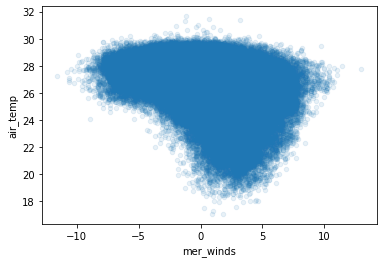

In [108]:
nino.plot.scatter(x='mer_winds', y='air_temp', alpha=.1)

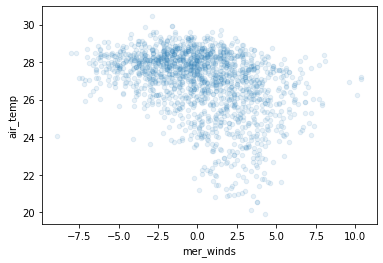

In [109]:
(nino
 .sample(2000)
 .plot.scatter(x='mer_winds', y='air_temp', alpha=.1)
)

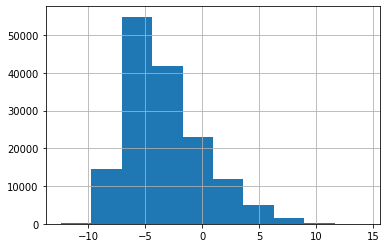

In [110]:
nino.zon_winds.hist()

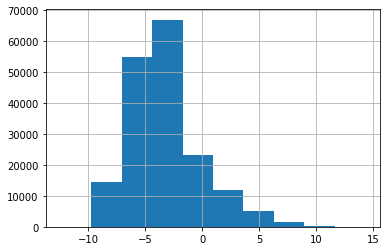

In [113]:
nino.zon_winds.fillna(nino.zon_winds.median()).hist()

# Grouping

Pandas allows us to perform aggregates calculations over grouped portions of ``Series`` or ``DataFrames``. The ``.groupby`` method is the low level workhorse that enables this.

In [114]:
# We can group by a column, but if it has unique values it isn't useful
nyc.groupby('EST').mean()['CloudCover']

EST
2006-01-01    8.0
2006-01-02    5.0
2006-01-03    8.0
2006-01-04    3.0
2006-01-05    6.0
             ... 
2014-12-27    0.0
2014-12-28    5.0
2014-12-29    0.0
2014-12-30    2.0
2014-12-31    2.0
Name: CloudCover, Length: 3287, dtype: float64

In [115]:
# We can group by a column, but if it has unique values it isn't useful
(nyc
 .groupby('EST')
 .mean()
 ['CloudCover']
)

EST
2006-01-01    8.0
2006-01-02    5.0
2006-01-03    8.0
2006-01-04    3.0
2006-01-05    6.0
             ... 
2014-12-27    0.0
2014-12-28    5.0
2014-12-29    0.0
2014-12-30    2.0
2014-12-31    2.0
Name: CloudCover, Length: 3287, dtype: float64

In [116]:
# Let's get the average cloud cover each month
(nyc
 .groupby(nyc.EST.dt.month)
 .mean()
 ['CloudCover']
)

EST
1     3.583643
2     3.397638
3     3.530466
4     3.381481
5     3.301075
6     3.088889
7     2.268817
8     2.573477
9     2.811111
10    3.462366
11    3.411111
12    3.989247
Name: CloudCover, dtype: float64

In [119]:
# The previous aggregated over every month, 
# what if we want to group by year and month?
(nyc
 .groupby([nyc.EST.dt.year, nyc.EST.dt.month])
 .mean()
 ['CloudCover']
)

EST   EST
2006  1      3.677419
      2      3.035714
      3      2.483871
      4      2.600000
      5      3.161290
               ...   
2014  8      2.516129
      9      2.733333
      10     4.064516
      11     3.700000
      12     5.000000
Name: CloudCover, Length: 108, dtype: float64

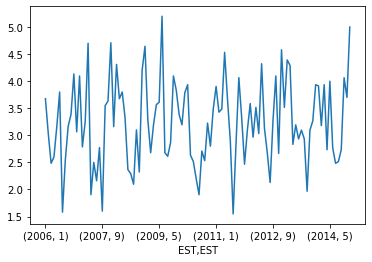

In [118]:
# The previous aggregated over every month, 
# what if we want to group by year and month?
(nyc
 .groupby([nyc.EST.dt.year, nyc.EST.dt.month])
 .mean()
 ['CloudCover']
 .plot()
)

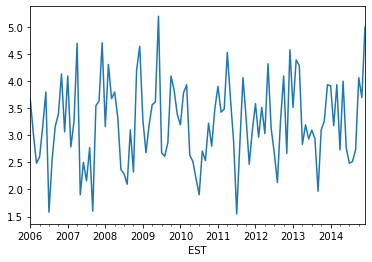

In [121]:
# To fix date/index can use grouper
(nyc
 .groupby(pd.Grouper(key='EST', freq='M'))
 .mean()
 ['CloudCover']
 .plot()
)

In [123]:
# With the .agg method we can apply many functions
(nyc
 .groupby(pd.Grouper(key='EST', freq='M'))
 .agg(['mean', 'max', 'count'])
)

Max_TemperatureF             Mean_TemperatureF              \
                       mean   max count              mean   max count   
EST                                                                     
2006-01-31        47.548387  64.0    31         41.161290  53.0    31   
2006-02-28        42.321429  62.0    28         35.928571  54.0    28   
2006-03-31        50.129032  74.0    31         43.032258  61.0    31   
2006-04-30        64.866667  82.0    30         55.266667  70.0    30   
2006-05-31        71.387097  88.0    31         62.838710  78.0    31   
...                     ...   ...   ...               ...   ...   ...   
2014-08-31        82.451613  90.0    31         74.709677  82.0    31   
2014-09-30        77.266667  92.0    30         69.933333  85.0    30   
2014-10-31        65.870968  77.0    31         59.870968  73.0    31   
2014-11-30        51.633333  69.0    30         45.533333  61.0    30   
2014-12-31        45.129032  65.0    31         40.774194  54.0    31   

           Min_TemperatureF             Max_Dew_PointF  ... PrecipitationIn  \
                       mean   max count           mean  ...           count   
EST                                                     ...                   
2006-01-31        34.193548  45.0    31      35.387097  ...              31   
2006-02-28        29.071429  46.0    28      26.035714  ...              28   
2006-03-31        35.612903  51.0    31      28.774194  ...              31   
2006-04-30        46.166667  57.0    30      43.466667  ...              30   
2006-05-31        54.903226  68.0    31      52.258065  ...              31   
...                     ...   ...   ...            ...  ...             ...   
2014-08-31        66.580645  73.0    31      62.548387  ...              31   
2014-09-30        62.200000  77.0    30      60.300000  ...              30   
2014-10-31        53.387097  69.0    31      51.935484  ...              31   
2014-11-30        38.966667  56.0    30      36.466667  ...              30   
2014-12-31        35.903226  44.0    31      34.483871  ...              31   

           CloudCover            WindDirDegrees              PrecipitationCm  \
                 mean  max count           mean    max count            mean   
EST                                                                            
2006-01-31   3.677419  8.0    31     199.903226  359.0    31        0.408858   
2006-02-28   3.035714  8.0    28     239.857143  339.0    28        0.261439   
2006-03-31   2.483871  7.0    31     214.161290  319.0    31        0.065630   
2006-04-30   2.600000  8.0    30     174.033333  354.0    30        0.470747   
2006-05-31   3.161290  8.0    31     143.225806  348.0    31        0.378542   
...               ...  ...   ...            ...    ...   ...             ...   
2014-08-31   2.516129  7.0    31     190.096774  350.0    31        0.184355   
2014-09-30   2.733333  8.0    30     155.000000  345.0    30        0.102616   
2014-10-31   4.064516  8.0    31     194.258065  309.0    31        0.473014   
2014-11-30   3.700000  8.0    30     236.533333  355.0    30        0.381847   
2014-12-31   5.000000  8.0    31     198.677419  338.0    31        0.494972   

                          
               max count  
EST                       
2006-01-31  2.9718    31  
2006-02-28  4.2164    28  
2006-03-31  1.3208    31  
2006-04-30  6.5786    30  
2006-05-31  4.0894    31  
...            ...   ...  
2014-08-31  1.5748    31  
2014-09-30  0.9398    30  
2014-10-31  3.8354    31  
2014-11-30  3.9116    30  
2014-12-31  6.4516    31  

[108 rows x 66 columns]

In [126]:
# Pull out a column
(nyc
 .groupby(pd.Grouper(key='EST', freq='M'))
 .agg(['mean', 'max', 'count'])
 .Mean_TemperatureF
)

,mean,max,count
EST,,,
2006-01-31,41.161290,53.0,31
2006-02-28,35.928571,54.0,28
2006-03-31,43.032258,61.0,31
2006-04-30,55.266667,70.0,30
2006-05-31,62.838710,78.0,31
...,...,...,...
2014-08-31,74.709677,82.0,31
2014-09-30,69.933333,85.0,30
2014-10-31,59.870968,73.0,31


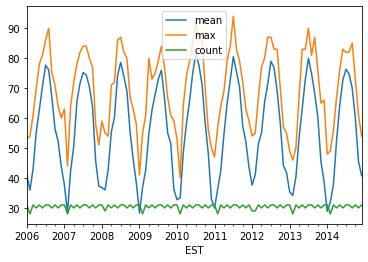

In [127]:
# Then Plot
(nyc
 .groupby(pd.Grouper(key='EST', freq='M'))
 .agg(['mean', 'max', 'count'])
 .Mean_TemperatureF
 .plot()
)

## Grouping Assignment
With the nino dataset:
* Find the mean temperature for each year
* Find the count of entries for each year
* Find the max temperature for each year

In [133]:
nino.groupby(nino.date.dt.year).air_temp.mean()

date
1980    22.774337
1981    22.454716
1982    24.640317
1983    25.320099
1984    23.810299
1985    24.913458
1986    26.217397
1987    27.098709
1988    25.203781
1989    26.062927
1990    26.664894
1991    27.043086
1992    27.097112
1993    27.112055
1994    27.058699
1995    26.814457
1996    26.633307
1997    27.571349
1998    27.805985
Name: air_temp, dtype: float64

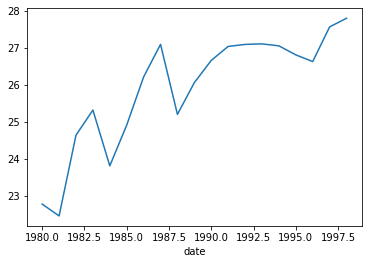

In [134]:
nino.groupby(nino.date.dt.year).air_temp.mean().plot()

In [132]:
nino.groupby(nino.date.dt.year).size()

date
1980      166
1981      545
1982      505
1983      406
1984      947
1985     1684
1986     3780
1987     4688
1988     6136
1989     7929
1990     8437
1991     8800
1992    16011
1993    20609
1994    21351
1995    21947
1996    21825
1997    22238
1998    10076
dtype: int64

In [130]:
nino.groupby(nino.date.dt.year).air_temp.max()

date
1980    27.28
1981    27.20
1982    27.50
1983    29.36
1984    27.65
1985    30.04
1986    30.52
1987    30.68
1988    30.86
1989    30.43
1990    30.09
1991    30.02
1992    31.48
1993    30.90
1994    30.31
1995    30.15
1996    30.19
1997    30.13
1998    31.66
Name: air_temp, dtype: float64

# Pivoting

In [135]:
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month],
                aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF'])

amax               count_nonzero             
         Max_Dew_PointF Max_Humidity Max_Dew_PointF Max_Humidity
year EST                                                        
2006 1             55.0        100.0           31.0         31.0
     2             55.0        100.0           28.0         28.0
     3             52.0        100.0           31.0         31.0
     4             57.0        100.0           30.0         30.0
     5             68.0        100.0           31.0         31.0
...                 ...          ...            ...          ...
2014 8             73.0         94.0           31.0         31.0
     9             73.0         93.0           30.0         30.0
     10            68.0         93.0           31.0         31.0
     11            60.0         93.0           30.0         30.0
     12            60.0        100.0           31.0         31.0

[108 rows x 4 columns]

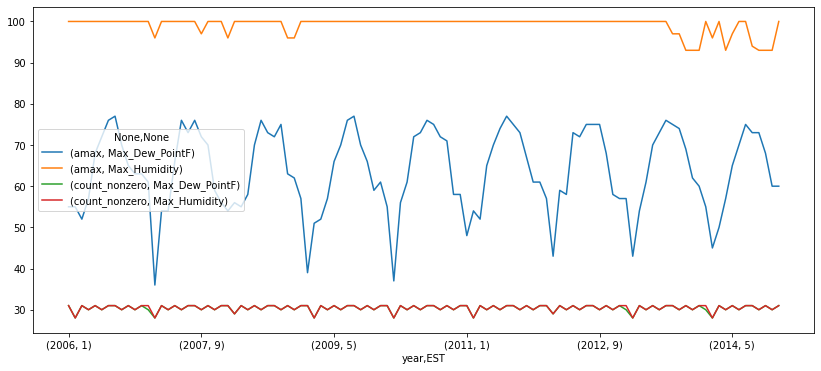

In [137]:
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month],
                aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).plot(figsize=(14,6))

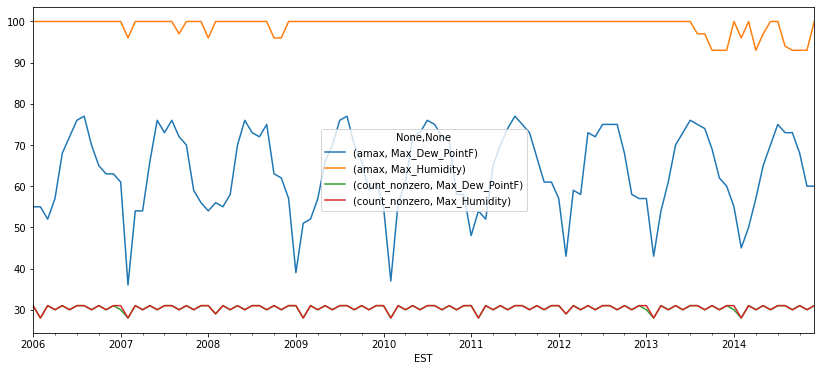

In [138]:
# Fix x-axis with grouper
nyc.pivot_table(index=pd.Grouper(key='EST', freq='m'), #[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month],
                aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).plot(figsize=(14,6))

In [141]:
# Back to multi-index....
# We can "unstack" to pull a left index into a column (0 is the left most index)
(nyc
 .pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], 
              aggfunc=[np.max, np.count_nonzero],
              values=['Max_Humidity', 'Max_Dew_PointF'])
 .unstack(0)
)

amax                                                  \
     Max_Dew_PointF                                                   
year           2006  2007  2008  2009  2010  2011  2012  2013  2014   
EST                                                                   
1              55.0  61.0  54.0  39.0  55.0  48.0  57.0  57.0  55.0   
2              55.0  36.0  56.0  51.0  37.0  54.0  43.0  43.0  45.0   
3              52.0  54.0  55.0  52.0  56.0  52.0  59.0  54.0  50.0   
4              57.0  54.0  58.0  57.0  61.0  65.0  58.0  61.0  57.0   
5              68.0  66.0  70.0  66.0  72.0  70.0  73.0  70.0  65.0   
6              72.0  76.0  76.0  70.0  73.0  74.0  72.0  73.0  70.0   
7              76.0  73.0  73.0  76.0  76.0  77.0  75.0  76.0  75.0   
8              77.0  76.0  72.0  77.0  75.0  75.0  75.0  75.0  73.0   
9              70.0  72.0  75.0  70.0  72.0  73.0  75.0  74.0  73.0   
10             65.0  70.0  63.0  66.0  71.0  67.0  68.0  69.0  68.0   
11             63.0  59.0  62.0  59.0  58.0  61.0  58.0  62.0  60.0   
12             63.0  56.0  57.0  61.0  58.0  61.0  57.0  60.0  60.0   

                   ...  count_nonzero                                       \
     Max_Humidity  ... Max_Dew_PointF Max_Humidity                           
year         2006  ...           2014         2006  2007  2008  2009  2010   
EST                ...                                                       
1           100.0  ...           30.0         31.0  31.0  31.0  31.0  31.0   
2           100.0  ...           28.0         28.0  28.0  29.0  28.0  28.0   
3           100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
4           100.0  ...           30.0         30.0  30.0  30.0  30.0  30.0   
5           100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
6           100.0  ...           30.0         30.0  30.0  30.0  30.0  30.0   
7           100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
8           100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
9           100.0  ...           30.0         30.0  30.0  30.0  30.0  30.0   
10          100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
11          100.0  ...           30.0         30.0  30.0  30.0  30.0  30.0   
12          100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   

                              
                              
year  2011  2012  2013  2014  
EST                           
1     31.0  31.0  31.0  31.0  
2     28.0  29.0  28.0  28.0  
3     31.0  31.0  31.0  31.0  
4     30.0  30.0  30.0  30.0  
5     31.0  31.0  31.0  31.0  
6     30.0  30.0  30.0  30.0  
7     31.0  31.0  31.0  31.0  
8     31.0  31.0  31.0  31.0  
9     30.0  30.0  30.0  30.0  
10    31.0  31.0  31.0  31.0  
11    30.0  30.0  30.0  30.0  
12    31.0  31.0  31.0  31.0  

[12 rows x 36 columns]

In [142]:
# We can "unstack" to pull a left index into a column (1 is the 2nd index)
(nyc
 .pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], 
              aggfunc=[np.max, np.count_nonzero],
              values=['Max_Humidity', 'Max_Dew_PointF'])
 .unstack(1)
)

amax                                                        \
     Max_Dew_PointF                                                         
EST              1     2     3     4     5     6     7     8     9     10   
year                                                                        
2006           55.0  55.0  52.0  57.0  68.0  72.0  76.0  77.0  70.0  65.0   
2007           61.0  36.0  54.0  54.0  66.0  76.0  73.0  76.0  72.0  70.0   
2008           54.0  56.0  55.0  58.0  70.0  76.0  73.0  72.0  75.0  63.0   
2009           39.0  51.0  52.0  57.0  66.0  70.0  76.0  77.0  70.0  66.0   
2010           55.0  37.0  56.0  61.0  72.0  73.0  76.0  75.0  72.0  71.0   
2011           48.0  54.0  52.0  65.0  70.0  74.0  77.0  75.0  73.0  67.0   
2012           57.0  43.0  59.0  58.0  73.0  72.0  75.0  75.0  75.0  68.0   
2013           57.0  43.0  54.0  61.0  70.0  73.0  76.0  75.0  74.0  69.0   
2014           55.0  45.0  50.0  57.0  65.0  70.0  75.0  73.0  73.0  68.0   

      ... count_nonzero                                                        
      ...  Max_Humidity                                                        
EST   ...            3     4     5     6     7     8     9     10    11    12  
year  ...                                                                      
2006  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2007  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2008  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2009  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2010  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2011  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2012  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2013  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2014  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  

[9 rows x 48 columns]

In [145]:
# Just use one value and one aggregation
(nyc
 .pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], 
              aggfunc=np.max,
              values='Mean_TemperatureF')
 .unstack(1)
)

Mean_TemperatureF                                                        \
EST                 1     2     3     4     5     6     7     8     9     10   
year                                                                           
2006              53.0  54.0  61.0  70.0  78.0  81.0  86.0  90.0  75.0  71.0   
2007              63.0  44.0  64.0  72.0  78.0  82.0  84.0  84.0  80.0  77.0   
2008              59.0  55.0  54.0  71.0  72.0  86.0  87.0  82.0  80.0  67.0   
2009              41.0  55.0  61.0  80.0  73.0  75.0  79.0  84.0  77.0  67.0   
2010              53.0  40.0  64.0  74.0  79.0  85.0  92.0  86.0  86.0  70.0   
2011              47.0  57.0  64.0  69.0  79.0  84.0  94.0  83.0  79.0  72.0   
2012              54.0  55.0  67.0  77.0  80.0  87.0  87.0  83.0  83.0  70.0   
2013              49.0  46.0  50.0  67.0  83.0  83.0  90.0  81.0  87.0  76.0   
2014              48.0  49.0  56.0  67.0  76.0  83.0  82.0  82.0  85.0  73.0   

                  
EST     11    12  
year              
2006  64.0  60.0  
2007  58.0  51.0  
2008  63.0  58.0  
2009  61.0  59.0  
2010  56.0  50.0  
2011  63.0  59.0  
2012  57.0  55.0  
2013  65.0  66.0  
2014  61.0  54.0

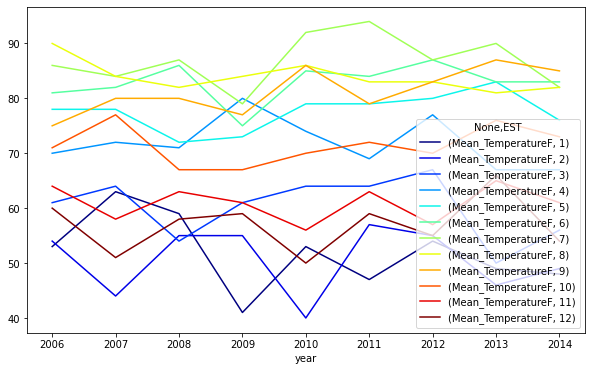

In [150]:
# Just use one value and one aggregation
(nyc
 .pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], 
              aggfunc=np.max,
              values='Mean_TemperatureF')
 .unstack(1)
 .plot(cmap='jet', figsize=(10,6))
)

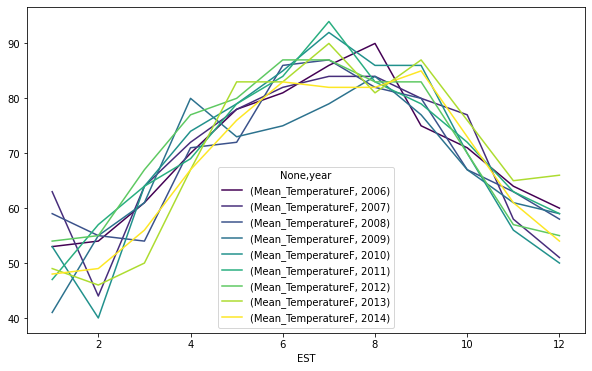

In [154]:
# Just use one value and one aggregation
(nyc
 .pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], 
              aggfunc=np.max,
              values='Mean_TemperatureF')
 .unstack(0)
 .plot(cmap='viridis', figsize=(10,6))
)

## Pivoting Assignment
With the nino dataset:
* Pivot the nino data using the ``.pivot_table`` method. Group by year and month, the ``air_temp`` column. Reduce using the ``max``, ``min``, and ``np.mean`` functions. (You will either need to create a month column or use ``year_month_day.dt.month``)
* Plot a line plot of the previous pivot table

In [160]:
nino.pivot_table(index=[nino.date.dt.year, nino.date.dt.month], aggfunc=[np.max, 'min', np.mean], values='air_temp')

amax      min       mean
          air_temp air_temp   air_temp
date date                             
1980 3       27.28    24.66  25.793478
     8       23.12    20.95  21.878095
     9       22.93    21.72  22.167000
     10      22.45    20.42  21.278387
     11      23.68    22.18  22.827333
...            ...      ...        ...
1998 2       29.59    24.99  27.734042
     3       29.96    25.23  27.868219
     4       30.08    21.37  27.895766
     5       30.26    23.87  27.931499
     6       30.04    22.61  27.293246

[211 rows x 3 columns]

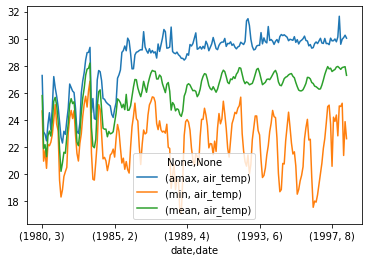

In [162]:
(nino
 .pivot_table(index=[nino.date.dt.year, nino.date.dt.month], aggfunc=[np.max, 'min', np.mean], values='air_temp')
 .plot()
)

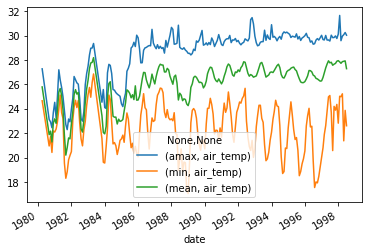

In [163]:
# fix x-axis
(nino
 .pivot_table(index=pd.Grouper(key='date', freq='m'), aggfunc=[np.max, 'min', np.mean], values='air_temp')
 .plot()
)

## Pivoting Bonus Assignment

* Using ``.groupby`` we can sometimes perform the same operation as pivot tables. Pivot the nino data using the ``.groupby`` method. Group by year and month, the ``air_temp_`` column. Reduce using the ``max``, ``min``, and ``np.mean`` functions using ``.groupby``. (Hint: Use the ``.agg`` method on the result of the group by)
* Use ``.unstack`` to see the mean ``air_temp_`` by year

In [167]:
(nino
 .groupby([nino.date.dt.year, nino.date.dt.month])
 .air_temp
 .agg(['max', 'min', np.mean])
 )

max    min       mean
date date                         
1980 3     27.28  24.66  25.793478
     8     23.12  20.95  21.878095
     9     22.93  21.72  22.167000
     10    22.45  20.42  21.278387
     11    23.68  22.18  22.827333
...          ...    ...        ...
1998 2     29.59  24.99  27.734042
     3     29.96  25.23  27.868219
     4     30.08  21.37  27.895766
     5     30.26  23.87  27.931499
     6     30.04  22.61  27.293246

[211 rows x 3 columns]

In [169]:
(nino
 .groupby([nino.date.dt.year, nino.date.dt.month])
 .air_temp
 .agg(['max', 'min', np.mean])
 .unstack()
 ['mean']
 )

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1980,NaN,NaN,25.793478,NaN,NaN,NaN,NaN,21.878095,22.167000,21.278387,22.827333,23.173871
1981,22.801935,23.888214,25.377097,25.665000,25.087419,23.941000,21.821724,20.198387,20.814667,21.609516,21.533833,22.755645
1982,23.729032,25.163929,25.570217,25.203667,25.340645,24.055000,22.356452,22.091290,23.040667,24.534444,25.626833,26.346452
1983,27.306452,27.757321,27.814355,28.197200,NaN,NaN,NaN,NaN,NaN,23.435385,22.057614,21.942877
1984,22.556290,24.971034,26.077258,26.220317,24.823226,23.390444,23.310430,23.319032,22.752444,23.147792,22.967500,23.013387
1985,23.123710,23.816607,24.496415,25.553934,25.449018,25.259350,24.902692,25.155114,24.756211,25.883727,24.707030,24.722595
1986,25.036488,25.730417,26.438654,26.986834,26.965633,26.368158,26.009697,25.718028,26.155756,26.846886,26.415326,26.038965
1987,26.648346,27.082519,27.456616,27.657611,27.597080,27.587237,27.022162,27.021838,27.317744,27.192259,26.666381,26.331397
1988,26.014490,26.635038,26.760975,26.122759,24.723433,25.279470,25.119164,24.667701,24.818943,24.763799,24.393824,24.259240


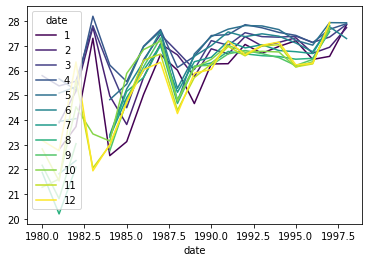

In [171]:
(nino
 .groupby([nino.date.dt.year, nino.date.dt.month])
 .air_temp
 .agg(['max', 'min', np.mean])
 .unstack()
 ['mean']
 .plot(cmap='viridis')
 )